## PAUTA Control 2 INFO273. Redes de Colas
Utilice papel y lápiz para los desarrollos teóricos, les toma una foto y los incorpora como imagen en este notebook.
Para las partes que requieren cáculos matemáticos utilice código incrustado (en R o Python según sea su conveniencia).
Suba la carpeta comprimida con sus respuestas al espacio definido en siveducMD.

**1.** Considere el modelo de un sistema informático que consta de un procesador y dos unidades de disco magnético idénticas. Los trabajos del sistema siguen el comportamiento de un servidor central. Las razones de visita y los tiempos de servicio (en segundos) se detallan en la siguiente tabla:

$$\begin{array}{| c | c | c | c |}
\hline
\text{Nodo} & \text{Dispositivo} & \text{Tiempo medio} & \text{Tasa}  \\
&& \text{de servicio} & \text{de visitas} \\ \hline
1 & \text{Procesador (1)} & 0,01 & 25 \\
2 & \text{Disco A (2)} & 0,04 & 12 \\
3 & \text{Disco B (3)}& 0,04 & 12 \\ \hline
\end{array} $$

**(1)** Suponga  que el sistema es sometido a una carga transaccional, con una tasa llegadas de dos trabajos por segundo. Modele este sistema con una red de colas abierta y calcule:

**(a)**  Para cada nodo la utilización, número medio de trabajos y tiempo de respuesta. ¿Cuál es el tiempo de respuesta del sistema informático?

**(b)**  ¿Cuál es la productividad (tasa de proceso) máxima que soporta este sistema?

**(c)**  ¿Qué pasaría si se reemplazan los dos discos por uno nuevo con un tiempo de servicio de 0,03 segundos? ¿Cuál es el nuevo tiempo de respuesta?

**Respuesta 1**

**(a)** Modelamos el sistema como una red abierta en que se puede calcular la demanda de cada nodo como:
$$D_i = \frac{v_i}{\mu_i} = v_i E(S_i) \qquad \text{y también} \qquad \rho_i = \gamma D_i\qquad \text{con} \qquad \gamma= 2[p/s]$$

Además 

$$L_i = \frac{\rho_i}{1-\rho_i},\qquad R_i = \frac{L_i}{\lambda_i}, \qquad R = \frac{\sum L_i}{\gamma} \qquad \text{con} \qquad \lambda_i= \gamma v_i$$

Calculando estos valores para cada nodo, tenemos:

$$\begin{array}{| c | c | c | c | c| c|c| c|c|}
\hline
\text{Nodo} & \text{Dispositivo} & \text{Tiempo medio} & \text{Tasa} & \text{Demanda} & \rho_i & L_i & \lambda_i & R_i \\
&& \text{de servicio }E(S_i) & \text{de visitas }v_i & D_i & & &\\ \hline
1 & \text{Procesador} & 0,01 & 25  & 0,25 & 0,50 & 1 & 50 & 0,02\\
2 & \text{Disco A} & 0,04 & 12 & 0,48& 0,96  & 24 & 24 & 1\\
3 & \text{Disco B}& 0,04 & 12 & 0,48 & 0,96 & 24 & 24& 1\\ \hline
\end{array} $$

Y finalmente
$$ R = \frac{1+24+24}{2} = 24,5[s]$$

**(b)** La tasa de proceso máxima $\gamma_{max}$ es la que permiten las condiciones de equilibrio:
$$\rho_i= \gamma D_i < 1, i=1,2,3$$

es decir 

$$\gamma_{max} < \min\{\frac{1}{0,25}, \frac{1}{0,48}\} = 2,083333$$

**(c)** En el nuevo sistema, la tasa de visita del nodo disco (2) será 24 y si $E(S_2) = 0,03$ entonces

$$\rho_{2} = \gamma v_{2} E(S_{2}) = 2*24*0,03 = 1,44 > 1$$

No se alcanza el equilibrio y el tiempo de respuesta aumenta indefinidamente.

**2.** Considere un sistema cliente-servidor en que $K=10$  clientes  se conectan a una base de datos mediante una red Ethernet. El servidor se representa por un nodo con tasa de servicio $\mu_3 = 6[req/s]$. El nodo 2 representa la red Ethernet cuya tasa de servicio $\mu_2 = 42[req/s]$ con una retroalimentación del 10% modelando la tasa de fallos.  La tasa media de reflexión de los clientes (Nodo 1) es $\mu_1 = 1[req/s]$ 

Modele este sistema como una red de colas cerradas en que suponemos tiempos de servicio exponencial en cada nodo y las siguientes probabilidades de ruteo:

$$q_{12} = 1 \qquad q_{32}=1 $$

$$q_{21} = 0.4 \qquad q_{22}= 0.1 \qquad q_{23} = 0.5$$

**(a)** Dibuje la red de colas y el grafo asociado y resuelva las ecs. de balance de flujo.

**(b)** Determine todas las medidas de desempeño de la red con alguno de los métodos que conoce. Comente sus resultados.

**(c)** Suponga que el número de estaciones de trabajo (clientes) en el sistema es variable, con $k=2,11, ...30$.  Grafique el comportamiento de la tasa de proceso del sistema en función de $k$. Interprete sus resultados.

**Respuesta (a)** La red de colas queda:
<img src="2_red.png" width="500">

y el grafo de la red es:
<img src="2_grafo.png" width="500">

Con lo cual, las ecuaciones de balance de flujo son:

$$\lambda_1 = 0.4\lambda_2$$
$$\lambda_2 = \lambda_1+0.1\lambda_2+\lambda_3$$
$$\lambda_3 = 0.5\lambda_2$$

Una solución posible es:
$$\lambda_1 = 0.4, \lambda_2=1, \lambda_3=0.5$$


**(b)** Utilizaremos el Algoritmo de Valor Medio. Para ello se requiere transformar la red cerrada en una red abierta equivalente:
<img src="2_redAbierta.png" width="500">

Con lo cual, resulta:

$$ v_0=1=v_1 \implies v_2=\frac{1}{0.4}=2.5, v_3=2.5*0.5 = 1.25$$



In [1]:
K=10
M=3
L <- rep(0,M)
R <- rep(0,M)
U <- rep(0,M)
u <- c(1,42,6)
v <- c(1,2.5,1.25)
prob <- matrix(1,nrow=K+1, ncol=M)
nprob <- matrix(1,nrow=K+1, ncol=M)
#Cálculo de mi_i(j), i=1,2,3,4 y j=1..K
mu <- matrix(0,nrow=K,ncol=M)
mu[1,]<- u
for (k in 2:K){
    mu[k,]<- c(u[1]*k,u[2],u[3])
    
}

#algoritmo iterativo para calcular R,T,L y U
for (k in 1:K){
    R <- rep(0,M)
    for (j in 1:k){
        R <- R + (prob[j,]*rep(j,M)/mu[j,])
    }
    T <- k/(t(v)%*%R)
    L <- rep(0,M)
    sum <- rep(0,M)
    for (j in 1:k){
        nprob[j+1,] <- rep(T,M)*(v/mu[j,])*prob[j,]
        sum <- sum + nprob[j+1,]
        L <- L + rep(j,M)*nprob[j+1,]
    }
    U <- sum
    nprob[1,] <- rep(1,M)-U
    prob <- nprob
}
print(prob)
tasa = rep(T,M)/v
print(rbind(L,U,tasa,R))

            [,1]         [,2]        [,3]
 [1,] 0.00839346 7.209070e-01 0.023174598
 [2,] 0.04028850 2.029087e-01 0.043567933
 [3,] 0.09669153 5.614966e-02 0.074272849
 [4,] 0.15470155 1.506548e-02 0.113302002
 [5,] 0.18562125 3.839052e-03 0.152135387
 [6,] 0.17812714 9.029673e-04 0.176025661
 [7,] 0.14230781 1.887390e-04 0.170529573
 [8,] 0.09711713 3.331482e-05 0.132728254
 [9,] 0.05729300 4.611232e-06 0.077777846
[10,] 0.02873201 4.411934e-07 0.030490560
[11,] 0.01072662 2.173367e-08 0.005995335
          [,1]       [,2]      [,3]
L    4.6887619 0.38168220 4.9295559
U    0.9916065 0.27909297 0.9768254
tasa 4.6887619 1.87550477 3.7510095
R    1.0000000 0.03256145 0.8410844


Como se puede ver con 10 clientes en el sistema, los servidores no alcanzan saturación, aunque el nodo 3, se encuentra mas estresado que el nodo 2, debido a que su tasa de servicio es bastante menor que la del nodo 2.

[1] 2.00000000 1.53270227 0.92825631 0.09123228 0.31931297
[1] 3.0000000 2.2205819 0.9662437 0.1321775 0.4626212
[1] 4.0000000 2.8395218 0.9799352 0.1690192 0.5915670
[1] 5.0000000 3.3764854 0.9858665 0.2009813 0.7034344
[1] 6.0000000 3.8206961 0.9887457 0.2274224 0.7959784
[1] 7.0000000 4.1668692 0.9902290 0.2480279 0.8680978
[1] 8.0000000 4.4179943 0.9910064 0.2629759 0.9204155
[1] 9.0000000 4.5859125 0.9914074 0.2729710 0.9553984
[1] 10.0000000  4.6887619  0.9916065  0.2790930  0.9768254
[1] 11.0000000  4.7463566  0.9917003  0.2825212  0.9888243
[1] 12.0000000  4.7759083  0.9917420  0.2842803  0.9949809
[1] 13.0000000  4.7898734  0.9917594  0.2851115  0.9978903
[1] 14.0000000  4.7959931  0.9917663  0.2854758  0.9991652
[1] 15.0000000  4.7984985  0.9917689  0.2856249  0.9996872
[1] 16.0000000  4.7994640  0.9917698  0.2856824  0.9998883
[1] 17.0000000  4.7998166  0.9917701  0.2857034  0.9999618
[1] 18.0000000  4.7999395  0.9917702  0.2857107  0.9999874
[1] 19.0000000  4.7999807  0.991

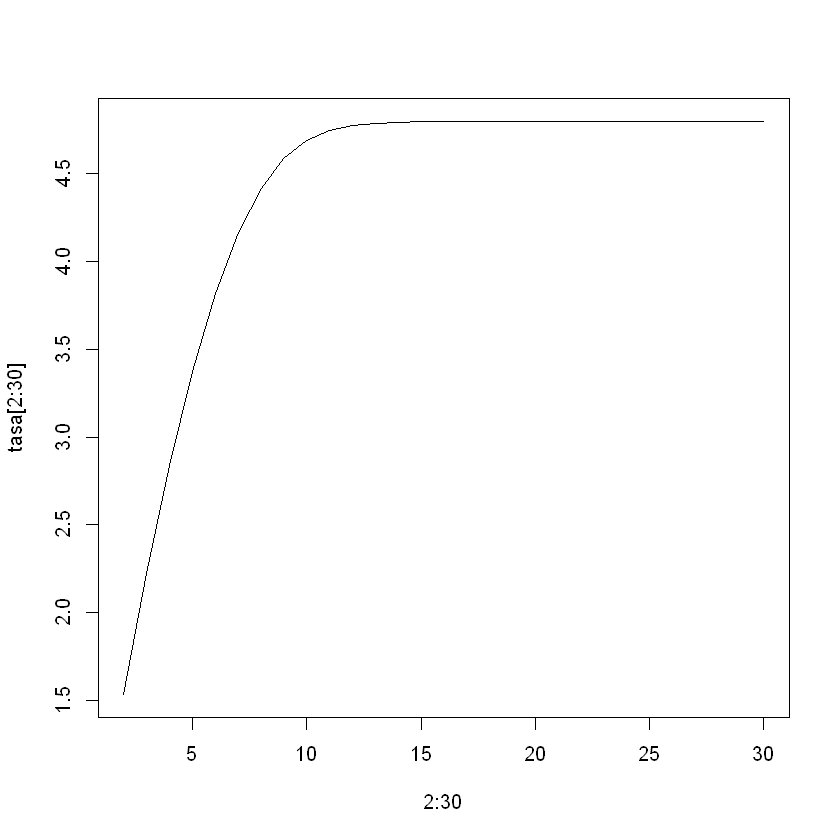

In [3]:
#(c)
tasa <- rep(0,30)
for(K in 2:30){
M=3
L <- rep(0,M)
R <- rep(0,M)
U <- rep(0,M)
u <- c(1,42,6)
v <- c(1,2.5,1.25)
prob <- matrix(1,nrow=K+1, ncol=M)
nprob <- matrix(1,nrow=K+1, ncol=M)
#Cálculo de mi_i(j), i=1,2,3,4 y j=1..K
mu <- matrix(0,nrow=K,ncol=M)
mu[1,]<- u
for (k in 2:K){
    mu[k,]<- c(u[1]*k,u[2],u[3])
    
}

#algoritmo iterativo para calcular R,T,L y U
for (k in 1:K){
    R <- rep(0,M)
    for (j in 1:k){
        R <- R + (prob[j,]*rep(j,M)/mu[j,])
    }
    T <- k/(t(v)%*%R)
    L <- rep(0,M)
    sum <- rep(0,M)
    for (j in 1:k){
        nprob[j+1,] <- rep(T,M)*(v/mu[j,])*prob[j,]
        sum <- sum + nprob[j+1,]
        L <- L + rep(j,M)*nprob[j+1,]
    }
    U <- sum
    nprob[1,] <- rep(1,M) - U
    prob <- nprob
}
tasa[K] = T
    print(c(K,T,U))
}
plot(2:30,tasa[2:30],type="l")

La saturación del nodo 3 se alcanza con 22 clientes y la tasa máxima de proceso es de 4.799 requerimientos por segundo.